In [1]:
#load librarires
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

C:\Users\Saroj Kumar Mohanty\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load data set
toy = pd.read_csv("C:/Users/Saroj Kumar Mohanty/OneDrive/Desktop/exclR assignments/Assignment/5 MLR/ToyotaCorolla.csv",encoding='latin1')

In [3]:
toy

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA Phase

In [4]:
toy.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
toy.shape

(1436, 38)

In [6]:
toy.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
toy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [8]:
toyota=pd.concat([toy.iloc[:,2:4],toy.iloc[:,6:7],toy.iloc[:,8:9],toy.iloc[:,12:14],toy.iloc[:,15:17],
                 toy.iloc[:,17:18]],axis=1)

In [9]:
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
toyota2=toyota.rename({'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'tax','Weight':'wt'},axis=1)

In [11]:
toyota2

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
#check null values
toyota2.isnull().sum()

price    0
age      0
km       0
hp       0
cc       0
doors    0
gears    0
tax      0
wt       0
dtype: int64

In [13]:
#check duplicated values
toyota2[toyota2.duplicated()]

,price,age,km,hp,cc,doors,gears,tax,wt
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
#drop duplicated values
toyota3=toyota2.drop_duplicates().reset_index(drop=True)

In [15]:
toyota3

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [16]:
toyota3.shape

(1435, 9)

In [17]:
toyota3.describe()

,price,age,km,hp,cc,doors,gears,tax,wt
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation Analysis

In [18]:
toyota3.corr()

,price,age,km,hp,cc,doors,gears,tax,wt
price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


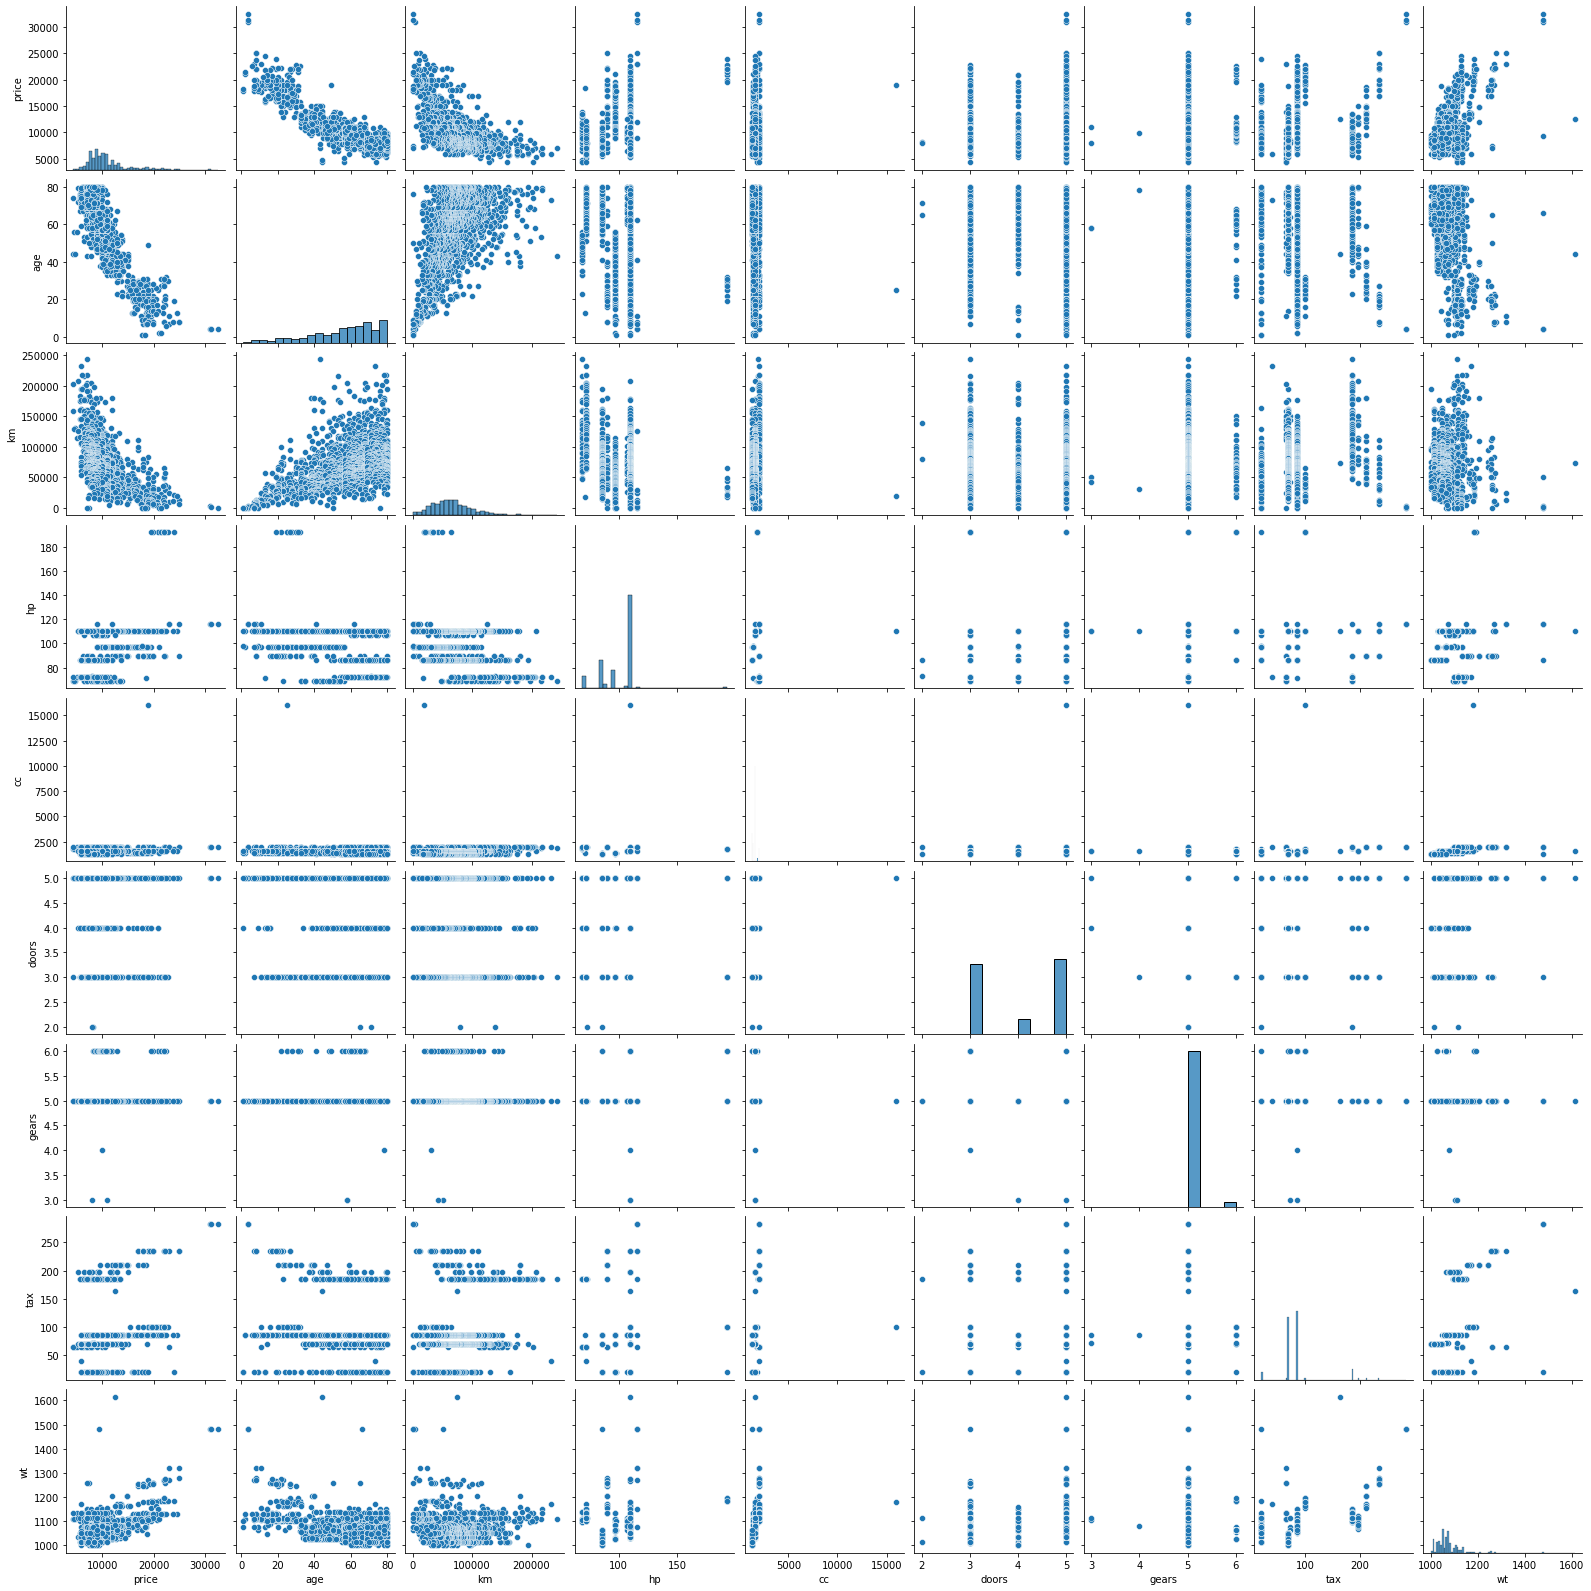

In [19]:
sns.pairplot(toyota3)

# MODEL BUILDING

In [20]:
model=smf.ols("price~age+km+hp+cc+doors+gears+tax+wt",data=toyota3).fit()

In [21]:
model

In [22]:
#coefficient parameters
model.params

Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
cc             -0.118558
doors          -0.920189
gears         597.715894
tax             3.858805
wt             16.855470
dtype: float64

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:06:10   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#pvalues and tvalues
model.tvalues, model.pvalues

(Intercept    -3.875273
 age         -46.551876
 km          -16.552424
 hp           11.209719
 cc           -1.316436
 doors        -0.023012
 gears         3.034563
 tax           2.944198
 wt           15.760663
 dtype: float64, Intercept     1.113392e-04
 age          1.879217e-288
 km            1.994713e-56
 hp            5.211155e-28
 cc            1.882393e-01
 doors         9.816443e-01
 gears         2.452430e-03
 tax           3.290363e-03
 wt            1.031118e-51
 dtype: float64)

In [26]:
# Finding rsquared values
model.rsquared , model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [27]:
# Build SLR and MLR models for insignificant variables 'cc' and 'doors'
# Also find their tvalues and pvalues

In [28]:
cc=smf.ols("price~cc",data=toyota3).fit()

In [29]:
cc.tvalues,cc.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64, Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [30]:
door=smf.ols("price~doors",data=toyota3).fit()

In [31]:
door.tvalues,door.pvalues

(Intercept    19.421546
 doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 doors        2.404166e-12
 dtype: float64)

In [32]:
ccdoor=smf.ols("price~cc+doors",data=toyota3).fit()
ccdoor.tvalues, ccdoor.pvalues

(Intercept    12.786341
 cc            4.268006
 doors         6.752236
 dtype: float64, Intercept    1.580945e-35
 cc           2.101878e-05
 doors        2.109558e-11
 dtype: float64)


# MODEL VALIDATION TECHNIQUE

Colinearity Check

In [35]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

In [38]:
rsq_age=smf.ols('age~km+hp+cc+doors+gears+tax+wt',data=toyota3).fit().rsquared
vif_age=1/(1-rsq_age)
vif_age

1.8762358497682892

In [39]:
rsq_km=smf.ols('km~age+hp+cc+doors+gears+tax+wt',data=toyota3).fit().rsquared
vif_km=1/(1-rsq_km)
vif_km

1.75717802398104

In [40]:
rsq_hp=smf.ols('hp~km+age+cc+doors+gears+tax+wt',data=toyota3).fit().rsquared
vif_hp=1/(1-rsq_hp)
vif_hp

1.419180108718214

In [41]:
rsq_cc=smf.ols('cc~km+hp+age+doors+gears+tax+wt',data=toyota3).fit().rsquared
vif_cc=1/(1-rsq_cc)
vif_cc

1.163470364594086

In [42]:
rsq_door=smf.ols('doors~km+hp+cc+age+gears+tax+wt',data=toyota3).fit().rsquared
vif_door=1/(1-rsq_door)
vif_door

1.1558898658142076

In [43]:
rsq_gear=smf.ols('gears~km+hp+cc+doors+age+tax+wt',data=toyota3).fit().rsquared
vif_gear=1/(1-rsq_gear)
vif_gear

1.0988429081631148

In [44]:
rsq_tax=smf.ols('tax~km+hp+cc+doors+gears+age+wt',data=toyota3).fit().rsquared
vif_tax=1/(1-rsq_tax)
vif_tax

2.295374508985715

In [45]:
rsq_wt=smf.ols('wt~km+hp+cc+doors+gears+tax+age',data=toyota3).fit().rsquared
vif_wt=1/(1-rsq_wt)
vif_wt

2.487180007179186

In [48]:
# Putting the values in Dataframe format
data={'Variables':['age','km','hp','cc','doors','gears','tax','Wt'],
    'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_door,vif_gear,vif_tax,vif_wt]}
Vif_df=pd.DataFrame(data)
Vif_df

,Variables,VIF
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,doors,1.155890
5,gears,1.098843
6,tax,2.295375
7,Wt,2.487180


In [49]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

2) Residual Analysis

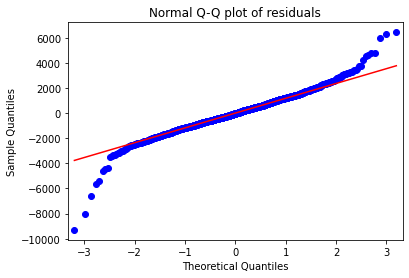

In [51]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
# 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [52]:
list(np.where(model.resid<-6000))  # outliar detection from above QQ plot of residuals

[array([220, 600, 959], dtype=int64)]

In [53]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [54]:
# Test for Homoscedasticity or Heteroscedasticity 
#(plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) :
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

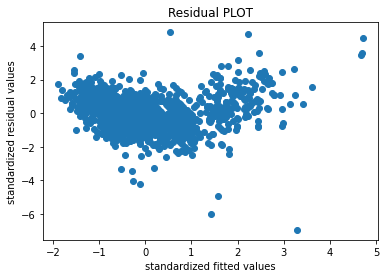

In [56]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual PLOT')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [57]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)   
# exog = x-variable & endog = y-variable

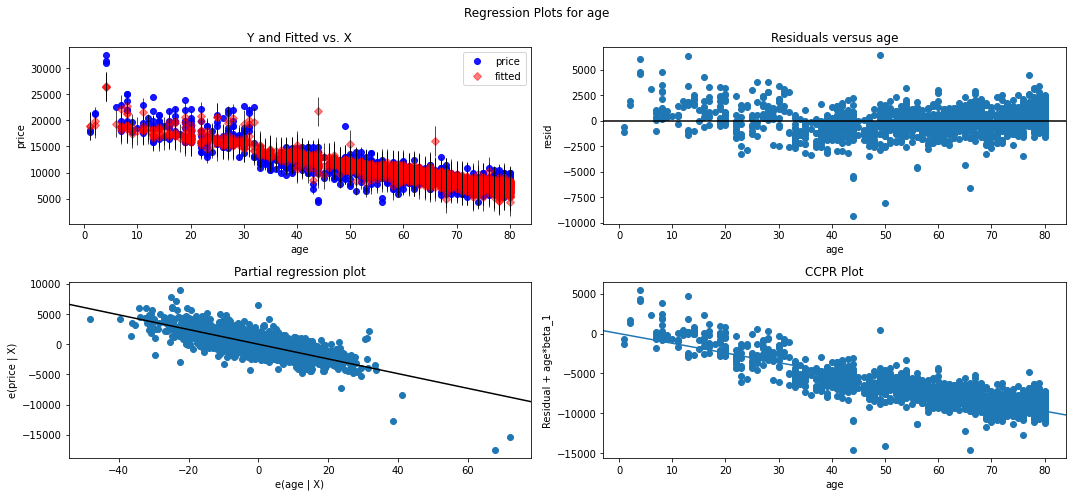

In [58]:
fig=plt.figure(figsize=(15,7))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

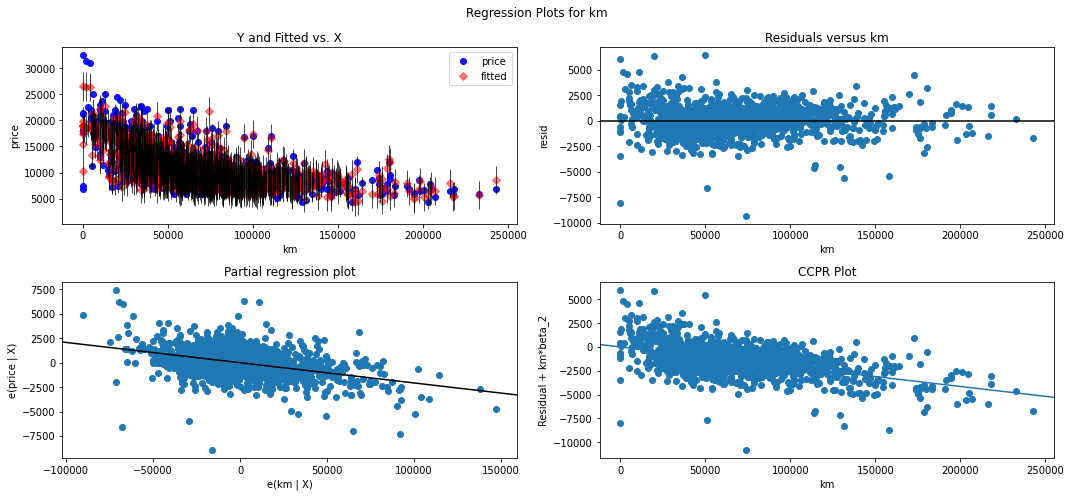

In [60]:
fig=plt.figure(figsize=(15,7))
sm.graphics.plot_regress_exog(model,'km',fig=fig)
plt.show()

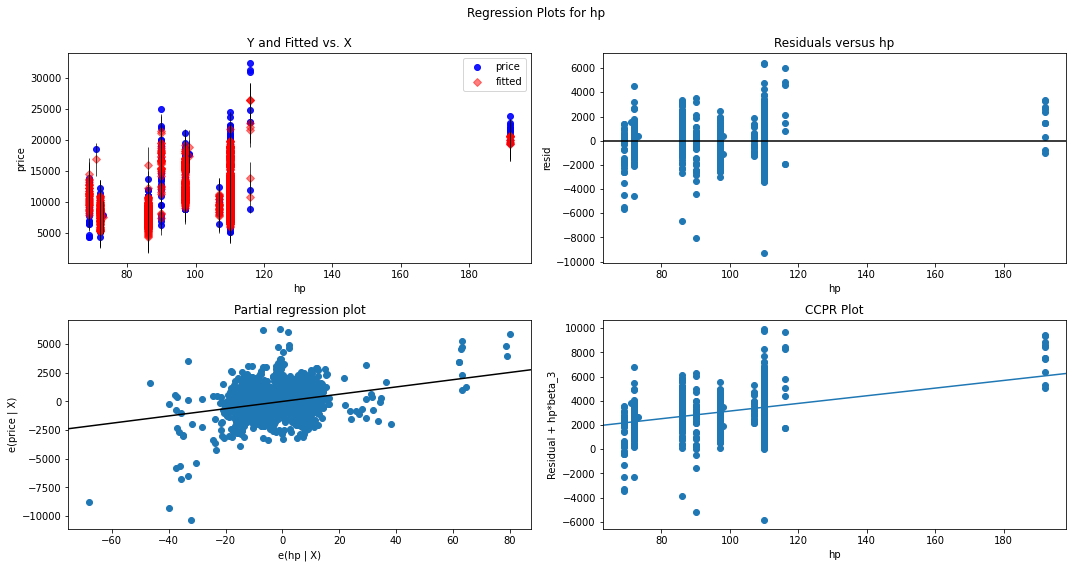

In [61]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'hp',fig=fig)
plt.show()

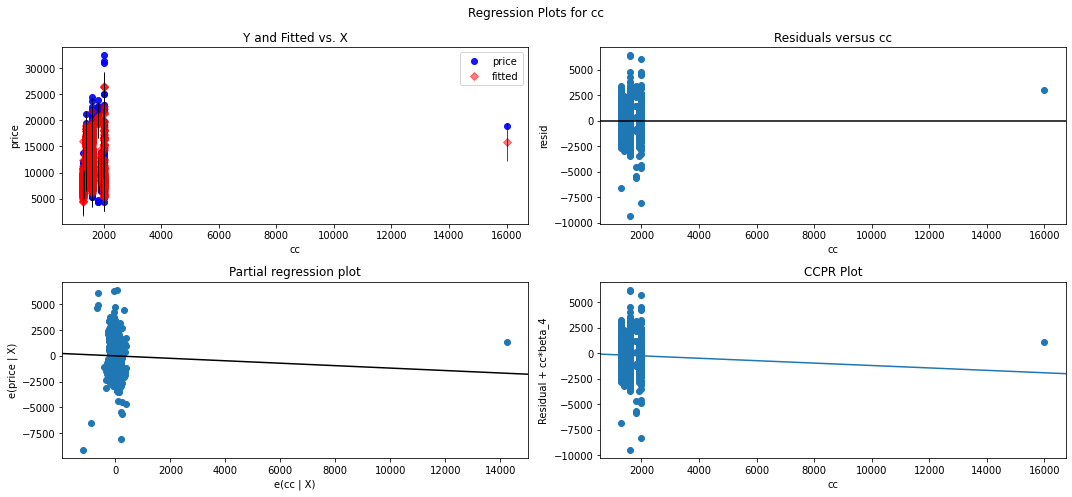

In [62]:
fig=plt.figure(figsize=(15,7))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

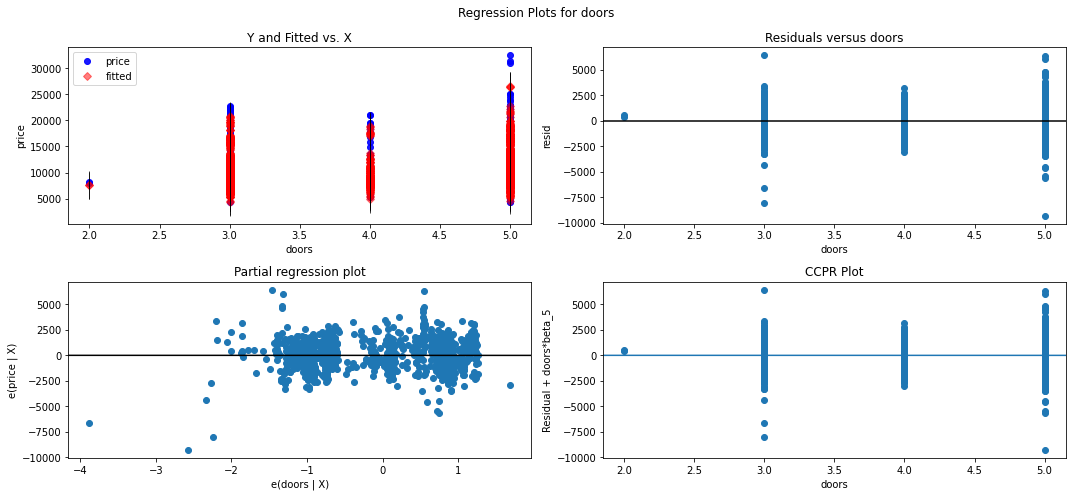

In [63]:
fig=plt.figure(figsize=(15,7))
sm.graphics.plot_regress_exog(model,'doors',fig=fig)
plt.show()

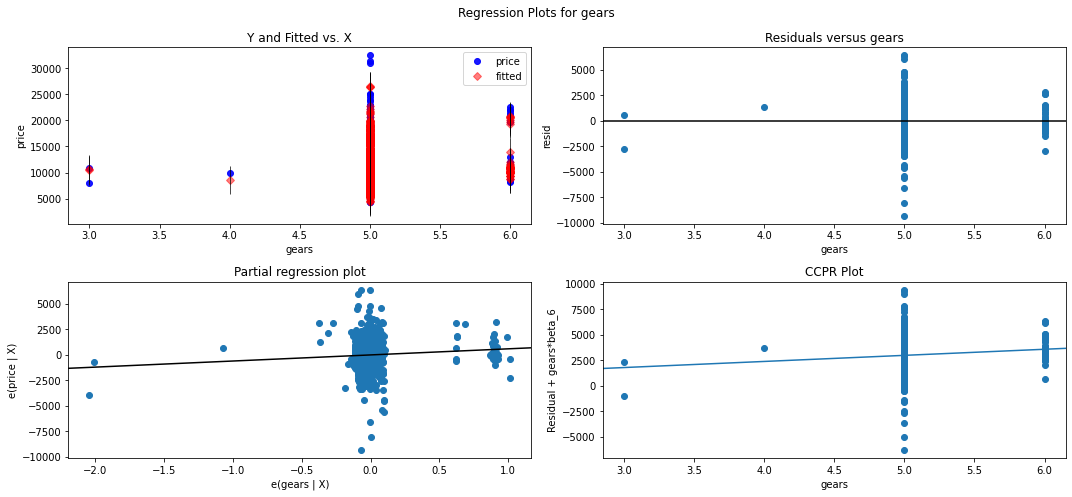

In [67]:
fig=plt.figure(figsize=(15,7))
sm.graphics.plot_regress_exog(model,'gears',fig=fig)
plt.show()

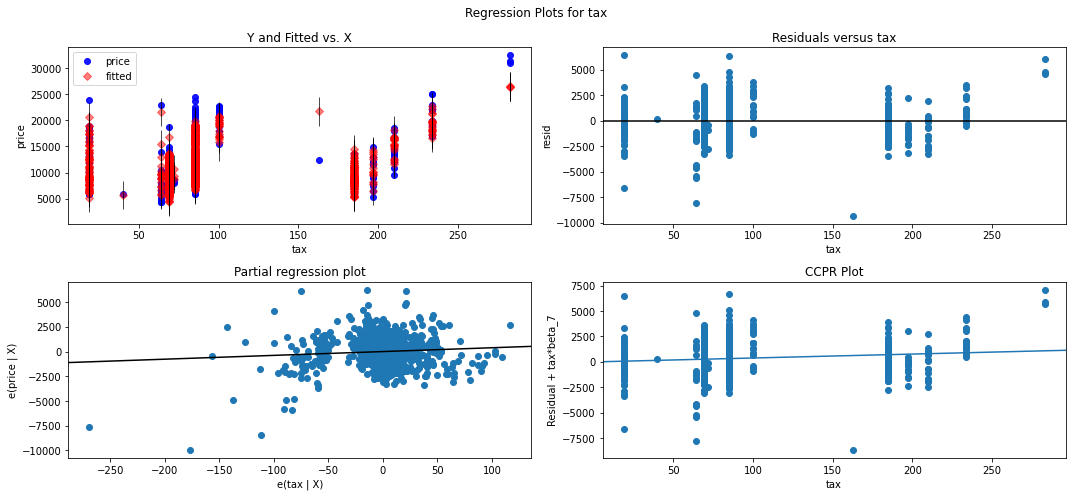

In [66]:
fig=plt.figure(figsize=(15,7))
sm.graphics.plot_regress_exog(model,'tax',fig=fig)
plt.show()

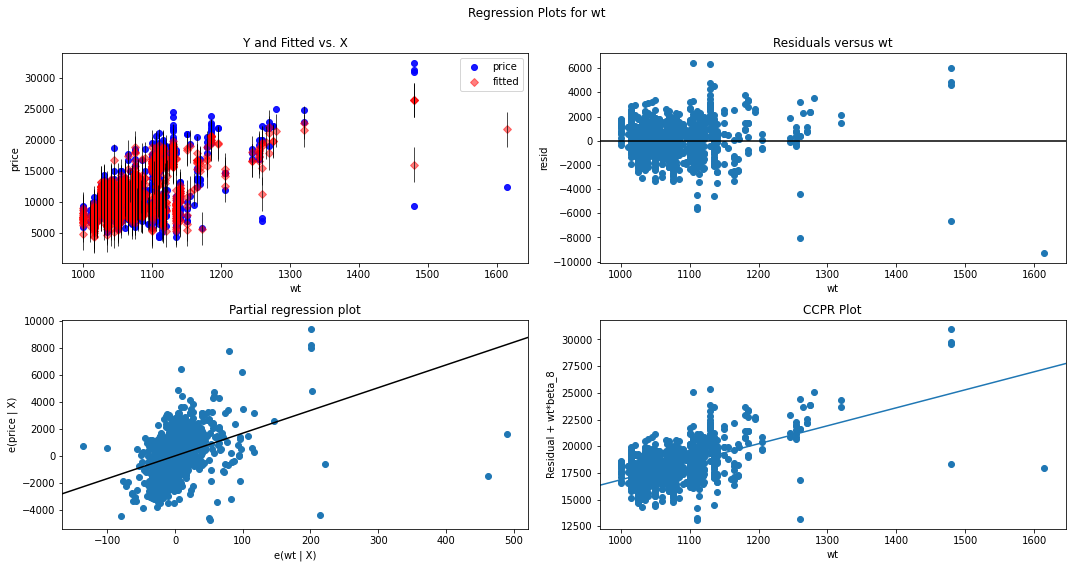

In [65]:
fig=plt.figure(figsize=(15,7))
sm.graphics.plot_regress_exog(model,'wt',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

### 1. Cook's Distance

In [68]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

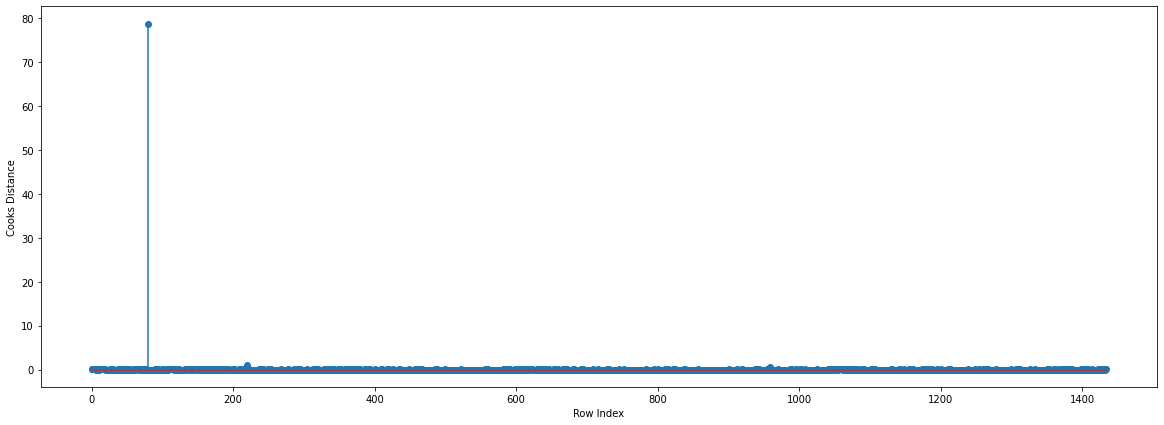

In [69]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258598)

## 2. Leverage

In [73]:
# Value using High Influence Points : Points beyond Leverage_cutoff value are influencers


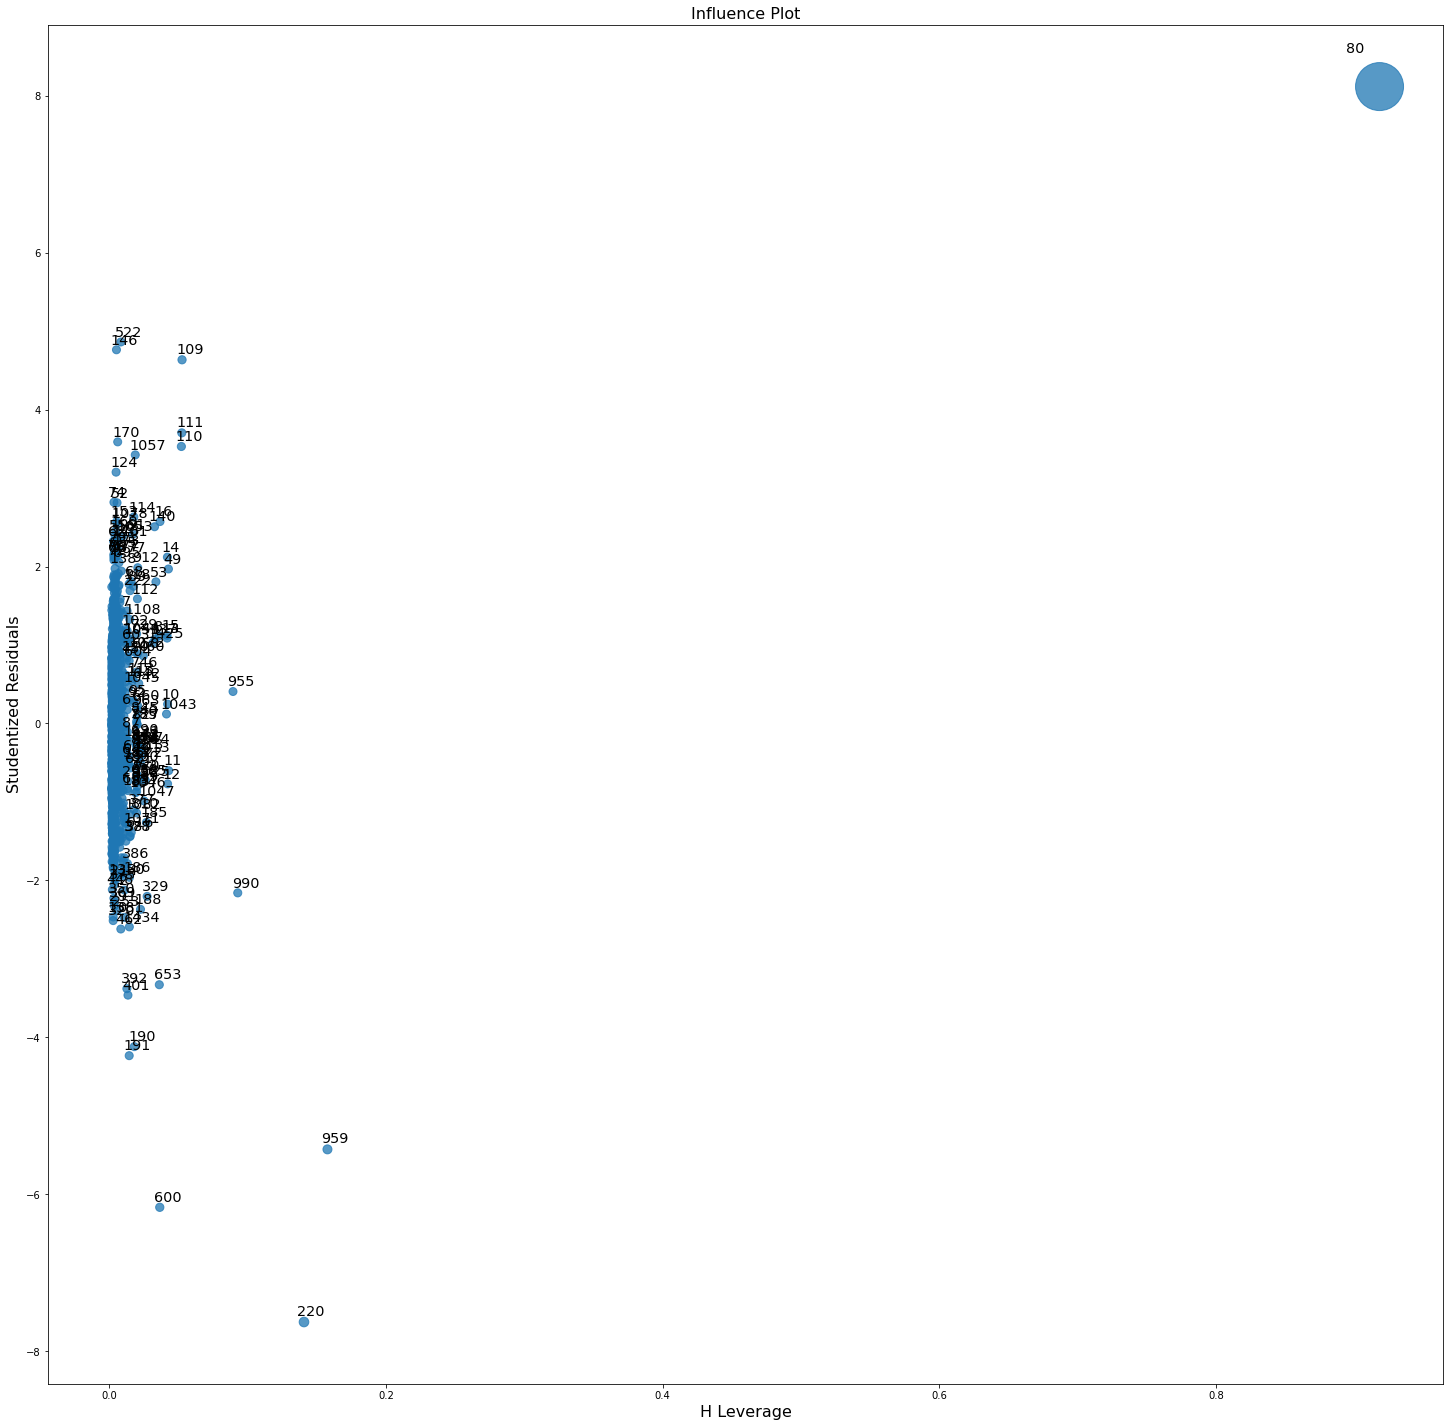

In [77]:
fig,ax=plt.subplots(figsize=(25,25))
fig=influence_plot(model,ax = ax)

In [78]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyota3.shape[1]
n=toyota3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [81]:
toyota3[toyota3.index.isin([80])]

,price,age,km,hp,cc,doors,gears,tax,wt
80,18950,25,20019,110,16000,5,5,100,1180


# Improving Model

In [82]:
# Creating a copy of data so that original dataset is not affected
toyo_new=toyota3.copy()
toyo_new

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [83]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyota4=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyota4

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [86]:
while np.max(c)>0.5 :
    model=smf.ols('price~age+km+hp+cc+doors+gears+tax+wt',data=toyota4).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota4=toyota4.drop(toyota4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota4
else:
    final_model=smf.ols('price~age+km+hp+cc+doors+gears+tax+wt',data=toyota4).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171202


In [87]:
final_model.rsquared

0.8882395145171202

In [88]:
toyota4

,price,age,km,hp,cc,doors,gears,tax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model Predictions

In [89]:
# New data for prediction
new_data=pd.DataFrame({'age':14,"km":35000,"hp":70,"cc":1500,"doors":4,"gears":5,"tax":69,"wt":1812},index=[0])
new_data

,age,km,hp,cc,doors,gears,tax,wt
0,14,35000,70,1500,4,5,69,1812


In [90]:
# Manual Prediction of Price
final_model.predict(new_data)

0    38836.491704
dtype: float64

In [92]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyota4)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64